In [1]:
from utils import *
import gerryfair
import pickle

import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

label feature: ['bar1']
sensitive features: ['race', 'fam_inc', 'age', 'gender']
there are 3 sensitive features including derivative features


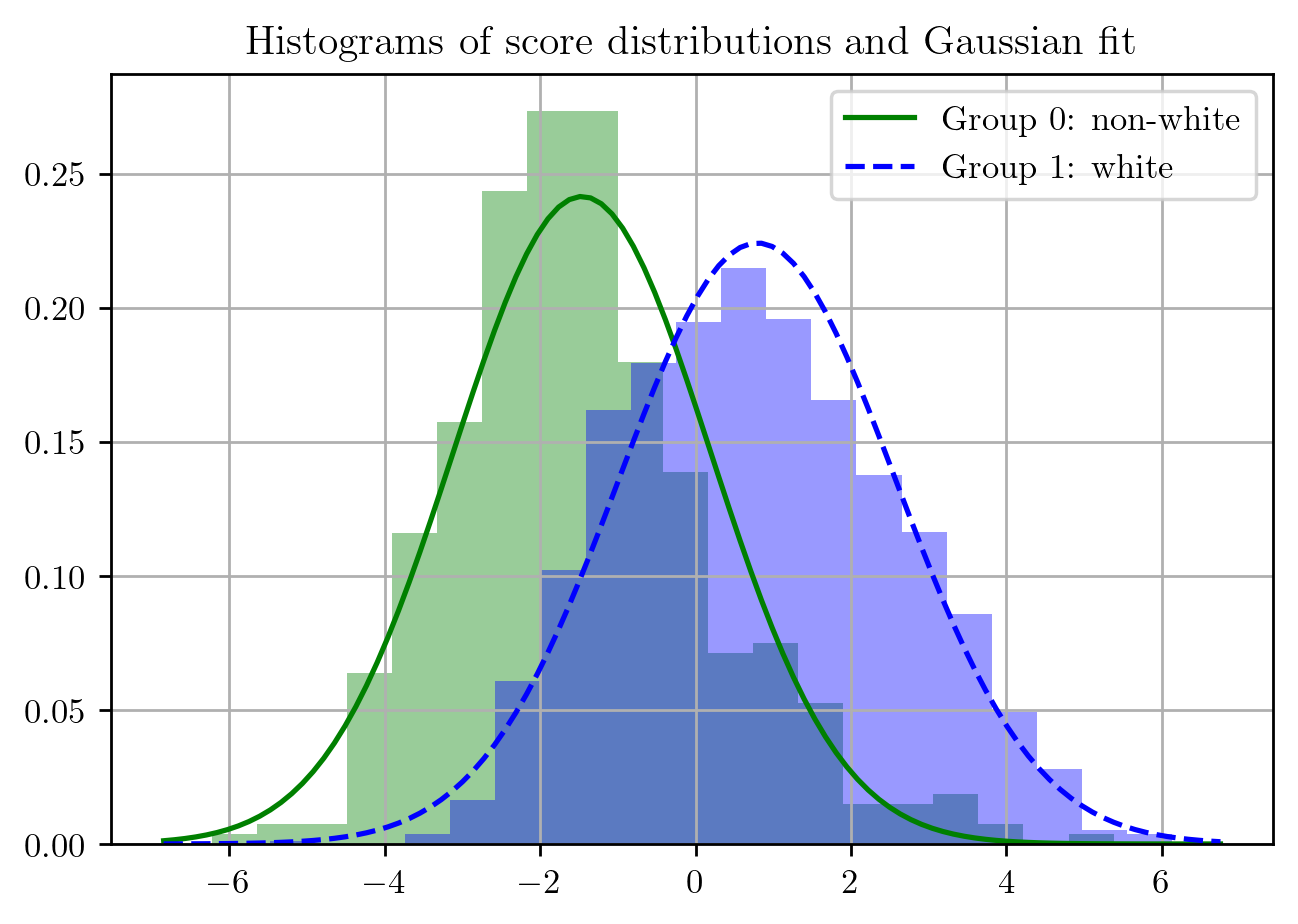

In [2]:
# Law school dataset:

dataset = "./datasets/lawschool.csv"
attributes = "./datasets/lawschool_protected.csv"
centered = False
# Process the dataset to acquire features and labels using Gerryfair's data cleaning method
X, X_prime, y = gerryfair.clean.clean_dataset(dataset, attributes, centered)

# Processing the law school admissions dataset to obtain relevant features and labels:
ff = X.values
race = ff[:,9:]
gender = ff[:,8]
race_white_vs_non_white = race[:,6] # 1-- white, 0--non-white
features = ff
labels = y.values
sensitive_attr = 'race'
idx_u = features[:,15]==0 # u --> non-white, v--> white
idx_v = features[:,15]==1
    
labels_u = np.ravel(labels[idx_u])
labels_v = np.ravel(labels[idx_v])

# Learn score distributions
model = LogisticRegression(max_iter = 1000, fit_intercept=False)
model.fit(features, labels)
fit_accuracy = model.score(features, labels)
score = model.coef_@features.T

score = np.ravel(score)
score = score.astype('float32')
score_u = score[idx_u]
score_v = score[idx_v]

mean_u,std_u=norm.fit(score_u.flatten())
mean_v,std_v=norm.fit(score_v.flatten())

plt.rc('text', usetex = True)
plt.rc('font', family='serif')
width = 6
height = 4
fig, ax = plt.subplots(nrows=1, ncols=1) 
fig.set_size_inches(width, height) #exact size of the figure
fig.set_dpi(250) 
ax.hist(score_u.flatten(), bins = 20, density=True, alpha = 0.4, color = 'green')
ax.hist(score_v.flatten(), bins = 20, density = True, alpha = 0.4, color = 'blue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y_u = norm.pdf(x, mean_u, std_u)
y_v = norm.pdf(x, mean_v, std_v)

ax.plot(x, y_u, color = 'green', label = 'Group 0: non-white')
ax.plot(x, y_v, color = 'blue', label = 'Group 1: white', linestyle = '--')
ax.set_title('Histograms of score distributions and Gaussian fit')
ax.legend()
ax.grid()
fig.savefig('figures/score_dist_law.pdf', bbox_inches='tight')

In [3]:
N = 400
c = np.array([0.15, 0.1, 0.05])
alpha = 0.5
theta_init = len(labels_u)/(len(labels_u)+len(labels_v))
lambdas_ = [3,5,15,25,75]
eta = 0.5
role_model = 0.8

mean = np.array([mean_u,mean_v]) # Groups U, V
std = np.array([std_u,std_v]) # Groups U, V
method = 'approx'
num_instances = 200
num_rounds = 25

decay = 0
seed_val = 23

In [4]:
pure_pos_reinf = True
role_model_reinf = True

In [5]:
results = []

for lambda_ in lambdas_:
    res = {}
    res['lambda'] = lambda_
    if pure_pos_reinf:
        np.random.seed(seed_val)
        applicants_u_MFG, admitted_u_MFG, theta_vec_MFG, role_model_MFG = process_MFG(N, c, alpha, mean, std, method, theta_init, lambda_, eta, num_instances, num_rounds, decay=decay, epsilon=0.01, reinf_method='positive')
        np.random.seed(seed_val)
        applicants_u_CMFG, admitted_u_CMFG, theta_vec_CMFG, role_model_CMFG = process_CMFG(N, c, alpha, mean, std, method, theta_init, lambda_, eta, num_instances, num_rounds, decay=decay, epsilon=0.01, reinf_method='positive')
    res['pure_pos_MFG'] = [applicants_u_MFG, admitted_u_MFG, theta_vec_MFG, role_model_MFG]
    res['pure_pos_CMFG'] = [applicants_u_CMFG, admitted_u_CMFG, theta_vec_CMFG, role_model_CMFG]

    if role_model_reinf:
        np.random.seed(seed_val)
        applicants_u_MFG, admitted_u_MFG, theta_vec_MFG, role_model_MFG = process_MFG(N, c, alpha, mean, std, method, theta_init, lambda_, eta, num_instances, num_rounds, decay=decay, epsilon=0.01, role_model_ratio=role_model, reinf_method='role_model')
        np.random.seed(seed_val)
        applicants_u_CMFG, admitted_u_CMFG, theta_vec_CMFG, role_model_CMFG = process_CMFG(N, c, alpha, mean, std, method, theta_init, lambda_, eta, num_instances, num_rounds, decay=decay, epsilon=0.01, role_model_ratio=role_model, reinf_method='role_model')
    res['role_model_MFG'] = [applicants_u_MFG, admitted_u_MFG, theta_vec_MFG, role_model_MFG]
    res['role_model_CMFG'] = [applicants_u_CMFG, admitted_u_CMFG, theta_vec_CMFG, role_model_CMFG]
    results.append(res)
    

100%|██████████| 200/200 [00:04<00:00, 40.62it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [01:40<00:00,  1.99it/s]


CMFG Setting, all instances are finished.


100%|██████████| 200/200 [00:02<00:00, 68.02it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [01:27<00:00,  2.28it/s]


CMFG Setting, all instances are finished.


100%|██████████| 200/200 [00:04<00:00, 41.95it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [01:56<00:00,  1.72it/s]


CMFG Setting, all instances are finished.


100%|██████████| 200/200 [00:02<00:00, 71.87it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [01:38<00:00,  2.02it/s]


CMFG Setting, all instances are finished.


100%|██████████| 200/200 [00:04<00:00, 41.42it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [03:51<00:00,  1.16s/it]


CMFG Setting, all instances are finished.


100%|██████████| 200/200 [00:04<00:00, 40.21it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [01:28<00:00,  2.25it/s]


CMFG Setting, all instances are finished.


100%|██████████| 200/200 [00:04<00:00, 42.02it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [04:18<00:00,  1.29s/it]


CMFG Setting, all instances are finished.


100%|██████████| 200/200 [00:04<00:00, 40.41it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [02:09<00:00,  1.54it/s]


CMFG Setting, all instances are finished.


100%|██████████| 200/200 [00:04<00:00, 41.29it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [04:40<00:00,  1.40s/it]


CMFG Setting, all instances are finished.


100%|██████████| 200/200 [00:04<00:00, 40.36it/s]


MFG Setting, all instances are finished.


100%|██████████| 200/200 [03:04<00:00,  1.08it/s]

CMFG Setting, all instances are finished.


In [6]:
with open('results/results_law_school.pkl', 'wb') as f:
    pickle.dump(results, f)

In [7]:
with open('results/results_law_school.pkl', 'rb') as f:
    results = pickle.load(f)

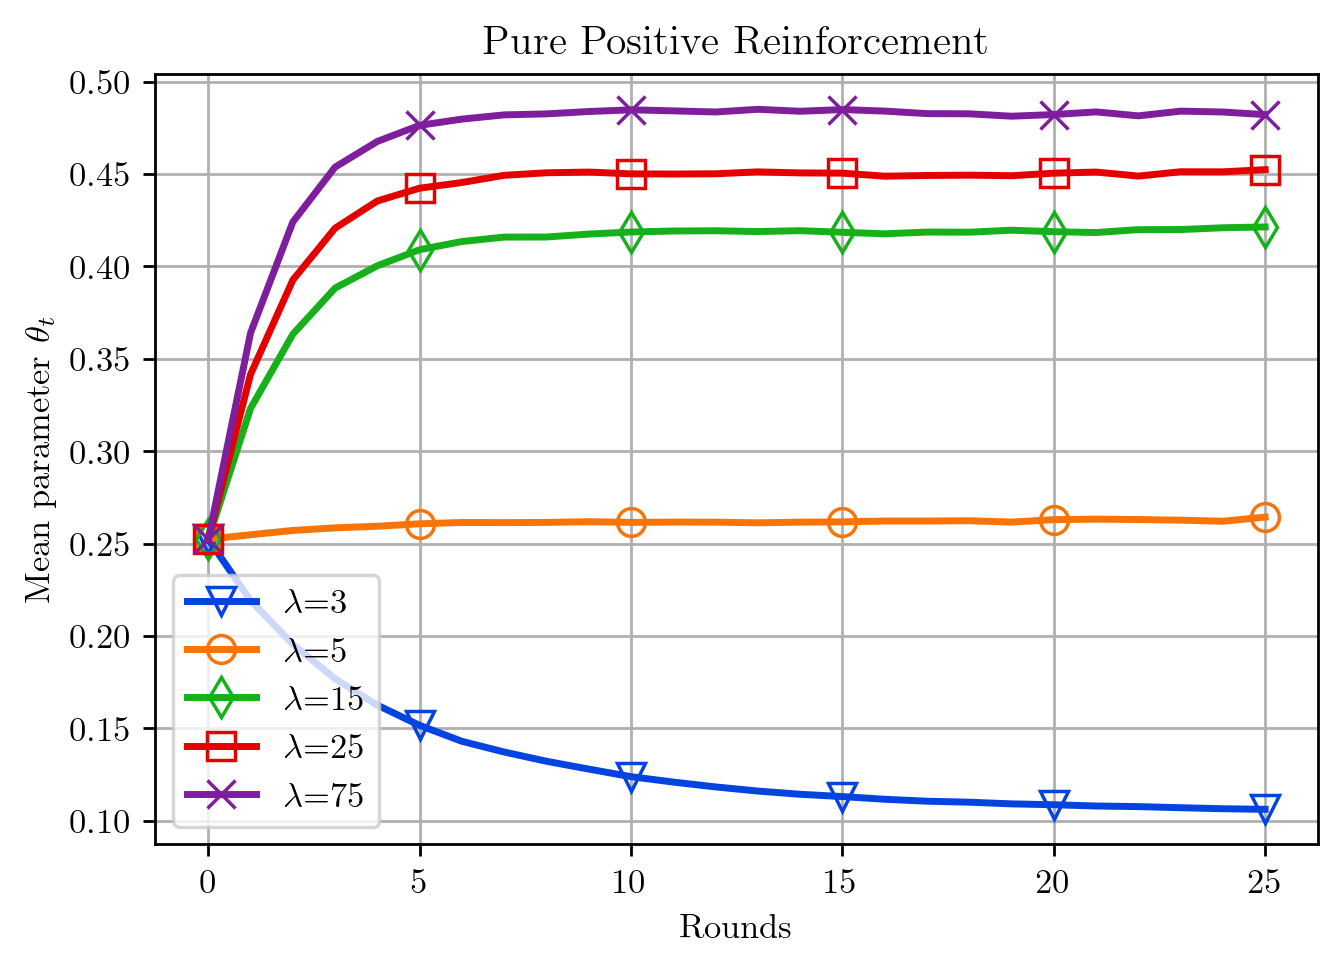

In [8]:
plt.rc('text', usetex = True)
plt.rc('font', family='serif')
width = 6
height = 4
fig, ax = plt.subplots(nrows=1, ncols=1) 
fig.set_size_inches(width, height) #exact size of the figure
fig.set_dpi(250) 
lw = 1
colors = ['xkcd:blue', 'xkcd:orange', 'xkcd:green', 'xkcd:red', 'xkcd:purple']
marker = ['o', 'd', 's', 'x', 'v']
for i in range(len(lambdas_)):
    theta_vec = results[i]['pure_pos_MFG'][2]
    ax.plot(theta_vec, label=r'$\lambda$'+'='+str(results[i]['lambda']), linewidth=lw+1, c=colors[i], marker=marker[i-1], markevery=5, markersize=8, markerfacecolor='none')
ax.set_title('Pure Positive Reinforcement')
ax.grid()
ax.set_xlabel('Rounds')
ax.set_ylabel('Mean parameter ' +r'$\theta_t$')
ax.legend()
fig.savefig('figures/law_school_pure_pos_MFG_lambda.pdf', bbox_inches='tight')

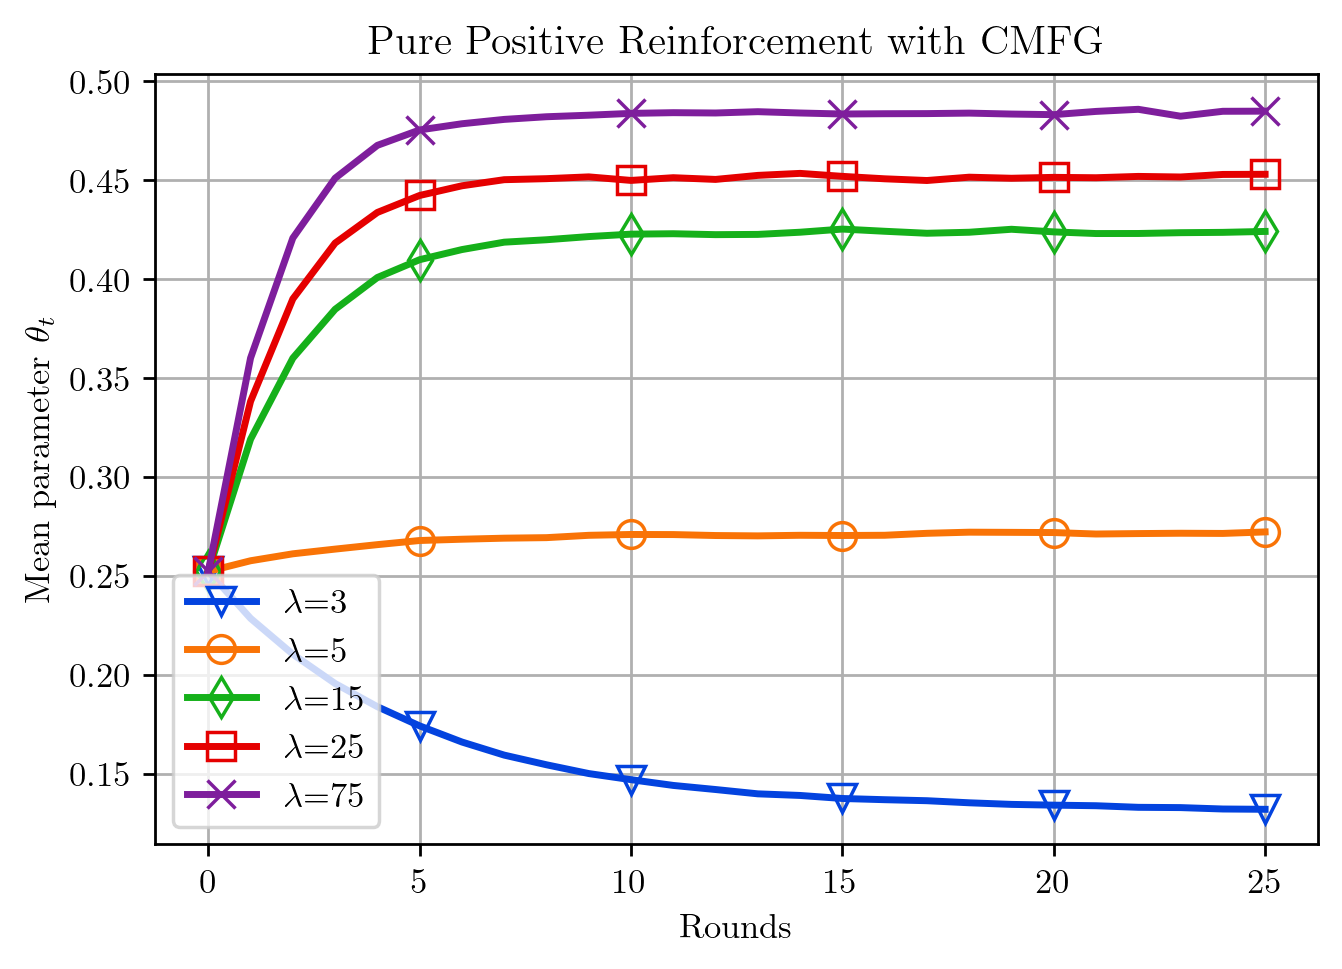

In [9]:
plt.rc('text', usetex = True)
plt.rc('font', family='serif')
width = 6
height = 4
fig, ax = plt.subplots(nrows=1, ncols=1) 
fig.set_size_inches(width, height) #exact size of the figure
fig.set_dpi(250) 
lw = 1
colors = ['xkcd:blue', 'xkcd:orange', 'xkcd:green', 'xkcd:red', 'xkcd:purple']
for i in range(len(lambdas_)):
    theta_vec = results[i]['pure_pos_CMFG'][2]
    ax.plot(theta_vec, label=r'$\lambda$'+'='+str(results[i]['lambda']), linewidth=lw+1, c=colors[i], marker=marker[i-1], markevery=5, markersize=8, markerfacecolor='none')
ax.set_title('Pure Positive Reinforcement with CMFG')
ax.grid()
ax.set_xlabel('Rounds')
ax.set_ylabel('Mean parameter ' +r'$\theta_t$')
ax.legend()
fig.savefig('figures/law_school_pure_pos_CMFG_lambda.pdf', bbox_inches='tight')

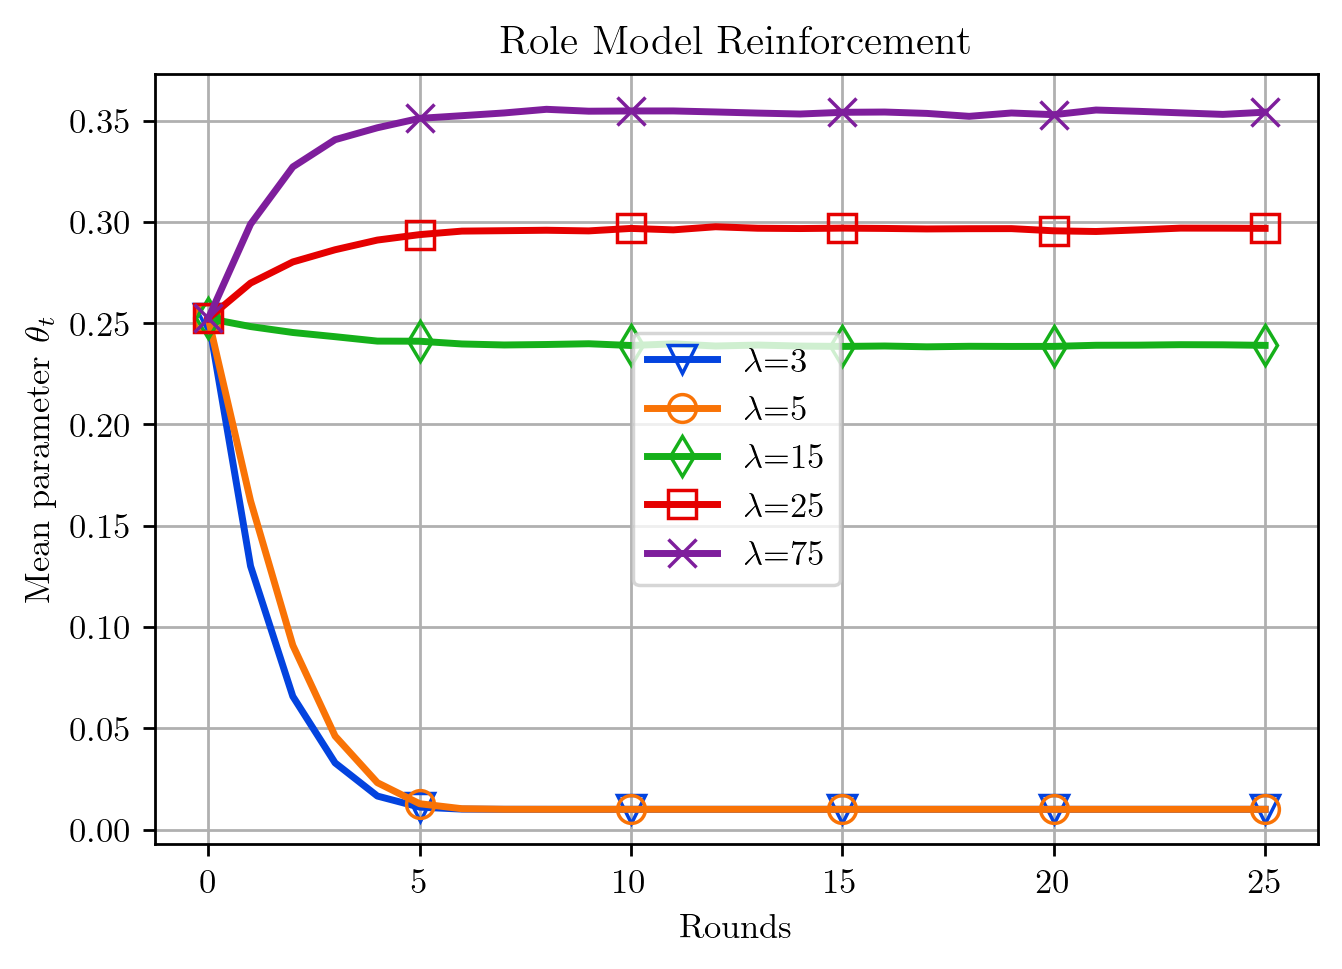

In [10]:
plt.rc('text', usetex = True)
plt.rc('font', family='serif')
width = 6
height = 4
fig, ax = plt.subplots(nrows=1, ncols=1) 
fig.set_size_inches(width, height) #exact size of the figure
fig.set_dpi(250) 
lw = 1
colors = ['xkcd:blue', 'xkcd:orange', 'xkcd:green', 'xkcd:red', 'xkcd:purple']
for i in range(len(lambdas_)):
    theta_vec = results[i]['role_model_MFG'][2]
    ax.plot(theta_vec, label=r'$\lambda$'+'='+str(results[i]['lambda']), linewidth=lw+1, c=colors[i], marker=marker[i-1], markevery=5, markersize=8, markerfacecolor='none')
ax.set_title('Role Model Reinforcement')
ax.grid()
ax.set_xlabel('Rounds')
ax.set_ylabel('Mean parameter ' +r'$\theta_t$')
ax.legend()
fig.savefig('figures/law_school_role_model_MFG_lambda.pdf', bbox_inches='tight')

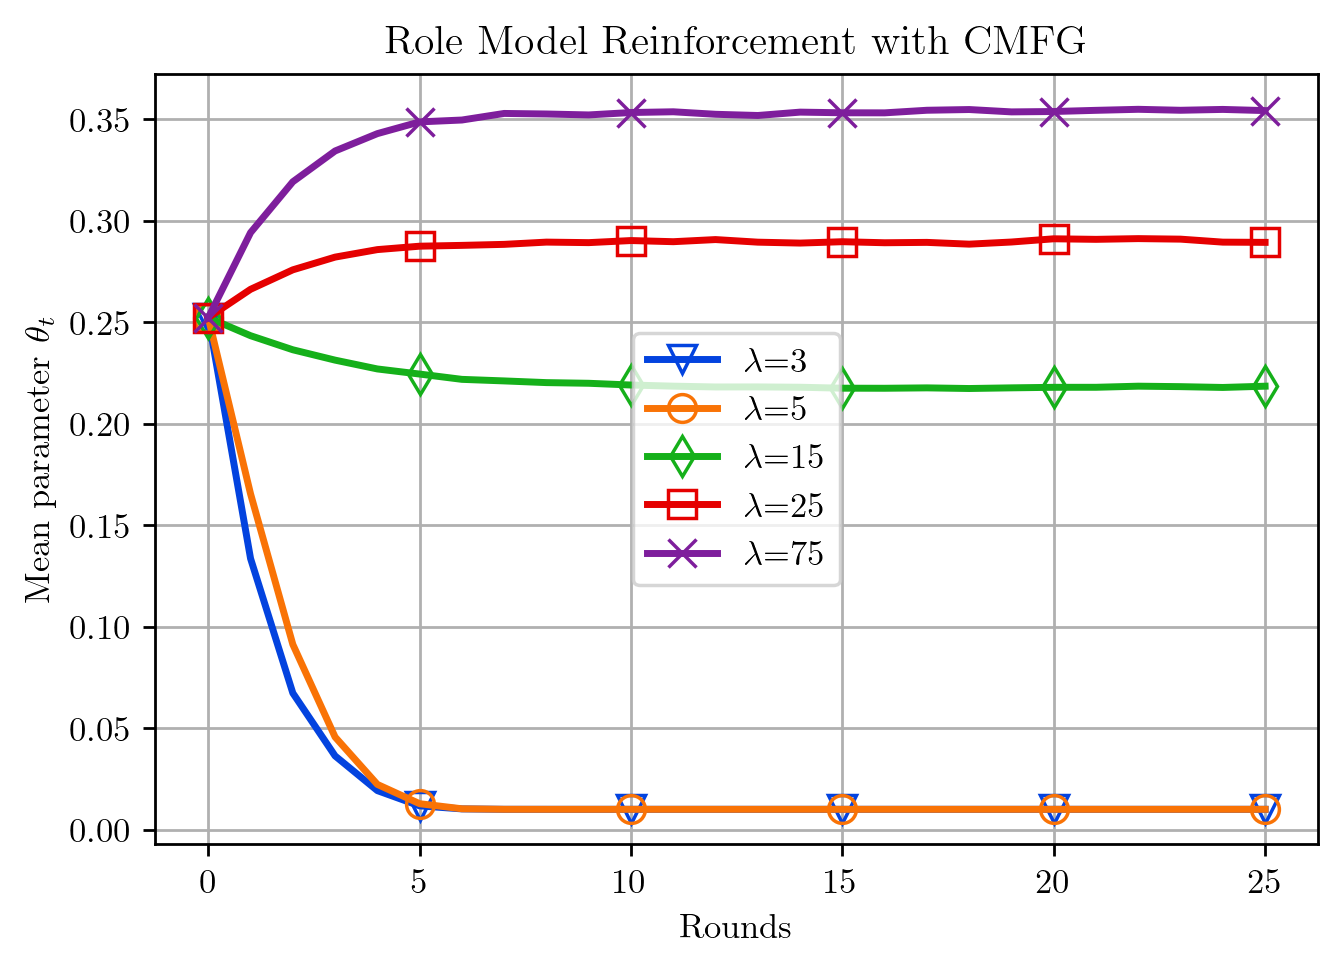

In [11]:
plt.rc('text', usetex = True)
plt.rc('font', family='serif')
width = 6
height = 4
fig, ax = plt.subplots(nrows=1, ncols=1) 
fig.set_size_inches(width, height) #exact size of the figure
fig.set_dpi(250) 
lw = 1
colors = ['xkcd:blue', 'xkcd:orange', 'xkcd:green', 'xkcd:red', 'xkcd:purple']

for i in range(len(lambdas_)):
    theta_vec = results[i]['role_model_CMFG'][2][:26]
    ax.plot(theta_vec, label=r'$\lambda$'+'='+str(results[i]['lambda']), linewidth=lw+1, c=colors[i], marker=marker[i-1], markevery=5, markersize=8, markerfacecolor='none')
ax.set_title('Role Model Reinforcement with CMFG')
ax.grid()
ax.set_xlabel('Rounds')
ax.set_ylabel('Mean parameter ' +r'$\theta_t$')
ax.legend()
fig.savefig('figures/law_school_role_model_CMFG_lambda.pdf', bbox_inches='tight')

In [12]:
# print the mean and std of the score distributions
print("Mean of the score distribution for group U: ", mean_u)
print("Mean of the score distribution for group V: ", mean_v)
print("Variance of the score distribution for group U: ", std_u**2)
print("Variance of the score distribution for group V: ", std_v**2)

Mean of the score distribution for group U:  -1.4614769
Mean of the score distribution for group V:  0.7924176
Variance of the score distribution for group U:  2.728856492977684
Variance of the score distribution for group V:  3.1676313834043555
